## Data exploration

In [18]:
# importing librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, log
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cluster  import  KMeans
from  sklearn.metrics  import confusion_matrix

# Lecture des données
## Charger les données ou les lire directement en précisant le chemin
hsd=pd.read_csv("healthcare_synthetic_data.csv",sep=",",header=0)
# Vérification de la forme des données
hsd.head()




,Patient_ID,Age,Gender,Height_cm,Weight_kg,BMI,Systolic_BP,Diastolic_BP,Cholesterol_Total,Cholesterol_LDL,Cholesterol_HDL,Fasting_Blood_Sugar,Smoking_Status,Alcohol_Consumption,Physical_Activity_Level,Family_History,Stress_Level,Sleep_Hours,Heart_Disease_Risk
0,PID-00001,60,0,146.9,51.3,23.8,140,89,217,151,52,83,0,1,3,0,1,8,0
1,PID-00002,53,0,161.8,76.6,29.3,128,81,203,119,38,116,0,0,1,0,7,9,0
2,PID-00003,62,1,174.7,92.4,30.3,141,100,173,124,45,90,0,0,0,0,1,7,1
3,PID-00004,73,1,173.3,68.9,22.9,136,96,193,117,45,81,0,0,1,0,2,7,1
4,PID-00005,52,1,178.6,79.8,25.0,122,80,236,153,41,79,0,1,2,0,2,6,0


In [19]:
hsd.dtypes

Patient_ID                  object
Age                          int64
Gender                       int64
Height_cm                  float64
Weight_kg                  float64
BMI                        float64
Systolic_BP                  int64
Diastolic_BP                 int64
Cholesterol_Total            int64
Cholesterol_LDL              int64
Cholesterol_HDL              int64
Fasting_Blood_Sugar          int64
Smoking_Status               int64
Alcohol_Consumption          int64
Physical_Activity_Level      int64
Family_History               int64
Stress_Level                 int64
Sleep_Hours                  int64
Heart_Disease_Risk           int64
dtype: object

List of quantitative variables
Gender
Smoking_Status
Alcohol_Consumption
Physical_Activity_Level 
Family_History
Stress_Level

In [34]:
qualitative_var = ["Gender", "Smoking_Status", "Alcohol_Consumption", "Physical_Activity_Level", 
                   "Family_History", "Stress_Level","Heart_Disease_Risk","Sleep_Hours"]

quantitative_var = ["Age","Height_cm","Weight_kg","BMI","Systolic_BP","Diastolic_BP",
                    "Cholesterol_Total","Cholesterol_LDL","Cholesterol_HDL", "Fasting_Blood_Sugar"]

for i in qualitative_var:
    hsd[i]=pd.Categorical(hsd[i])

"""
hsd["Patient_ID"]=pd.Categorical(hsd["Patient_ID"])
hsd["Gender"]=pd.Categorical(hsd["Gender"],ordered=False)
hsd["Smoking_Status"]=pd.Categorical(hsd["Gender"], ordered=False)
hsd["Alcohol_Consumption"]=pd.Categorical(hsd["Alcohol_Consumption"], ordered=False)
"""

'\nhsd["Patient_ID"]=pd.Categorical(hsd["Patient_ID"])\nhsd["Gender"]=pd.Categorical(hsd["Gender"],ordered=False)\nhsd["Smoking_Status"]=pd.Categorical(hsd["Gender"], ordered=False)\nhsd["Alcohol_Consumption"]=pd.Categorical(hsd["Alcohol_Consumption"], ordered=False)\n'

In [35]:
hsd.dtypes

Patient_ID                   object
Age                           int64
Gender                     category
Height_cm                   float64
Weight_kg                   float64
Systolic_BP                   int64
Diastolic_BP                  int64
Cholesterol_Total             int64
Cholesterol_LDL               int64
Cholesterol_HDL               int64
Smoking_Status             category
Alcohol_Consumption        category
Physical_Activity_Level    category
Family_History             category
Stress_Level               category
Sleep_Hours                category
Heart_Disease_Risk         category
LBMI                        float64
LFBS                        float64
dtype: object

In [36]:
hsd.describe()

,Age,Height_cm,Weight_kg,Systolic_BP,Diastolic_BP,Cholesterol_Total,Cholesterol_LDL,Cholesterol_HDL,LBMI,LFBS
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,54.538133,165.336767,75.252573,135.117667,90.541267,216.248000,140.355267,43.307867,3.301016,4.589779
std,11.875294,9.186313,14.110559,11.260634,8.443095,22.692222,17.914089,5.963153,0.149670,0.157163
min,25.000000,138.500000,33.700000,90.000000,60.000000,127.000000,70.000000,20.000000,2.674149,4.094345
25%,46.000000,158.500000,65.200000,127.000000,85.000000,201.000000,128.000000,39.000000,3.198673,4.488636
50%,55.000000,164.700000,73.900000,135.000000,91.000000,216.000000,140.000000,43.000000,3.303217,4.595120
75%,63.000000,172.000000,83.900000,143.000000,96.000000,231.000000,152.000000,47.000000,3.401197,4.700480
max,85.000000,198.100000,150.100000,182.000000,120.000000,303.000000,210.000000,68.000000,3.830813,5.117994


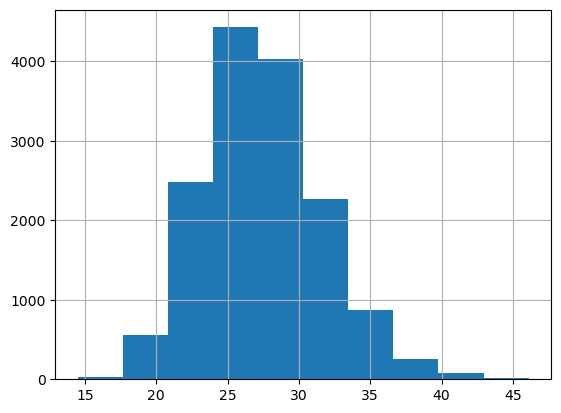

In [23]:
hsd["BMI"].hist()
plt.show()

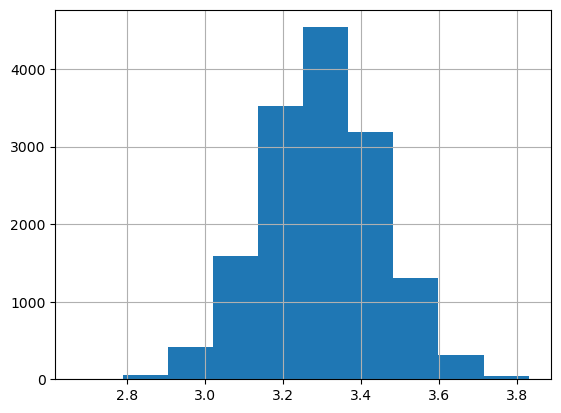

In [28]:
hsd["LBMI"]=hsd["BMI"].map(lambda x: log(x))
del hsd["BMI"]

hsd["LBMI"].hist()
plt.show()

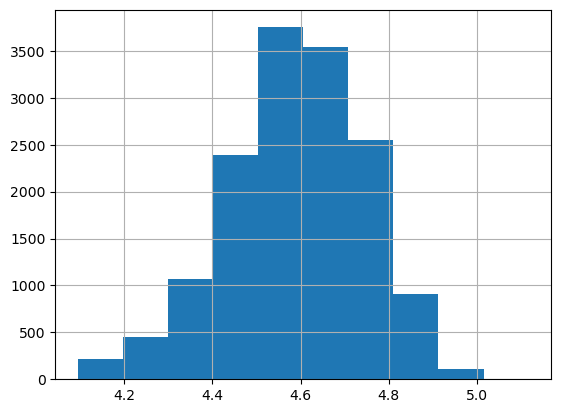

In [29]:
hsd["LFBS"]=hsd["Fasting_Blood_Sugar"].map(lambda x: log(x))
del hsd["Fasting_Blood_Sugar"]

hsd["LFBS"].hist()
plt.show()

### Analyse multidimensionnelle

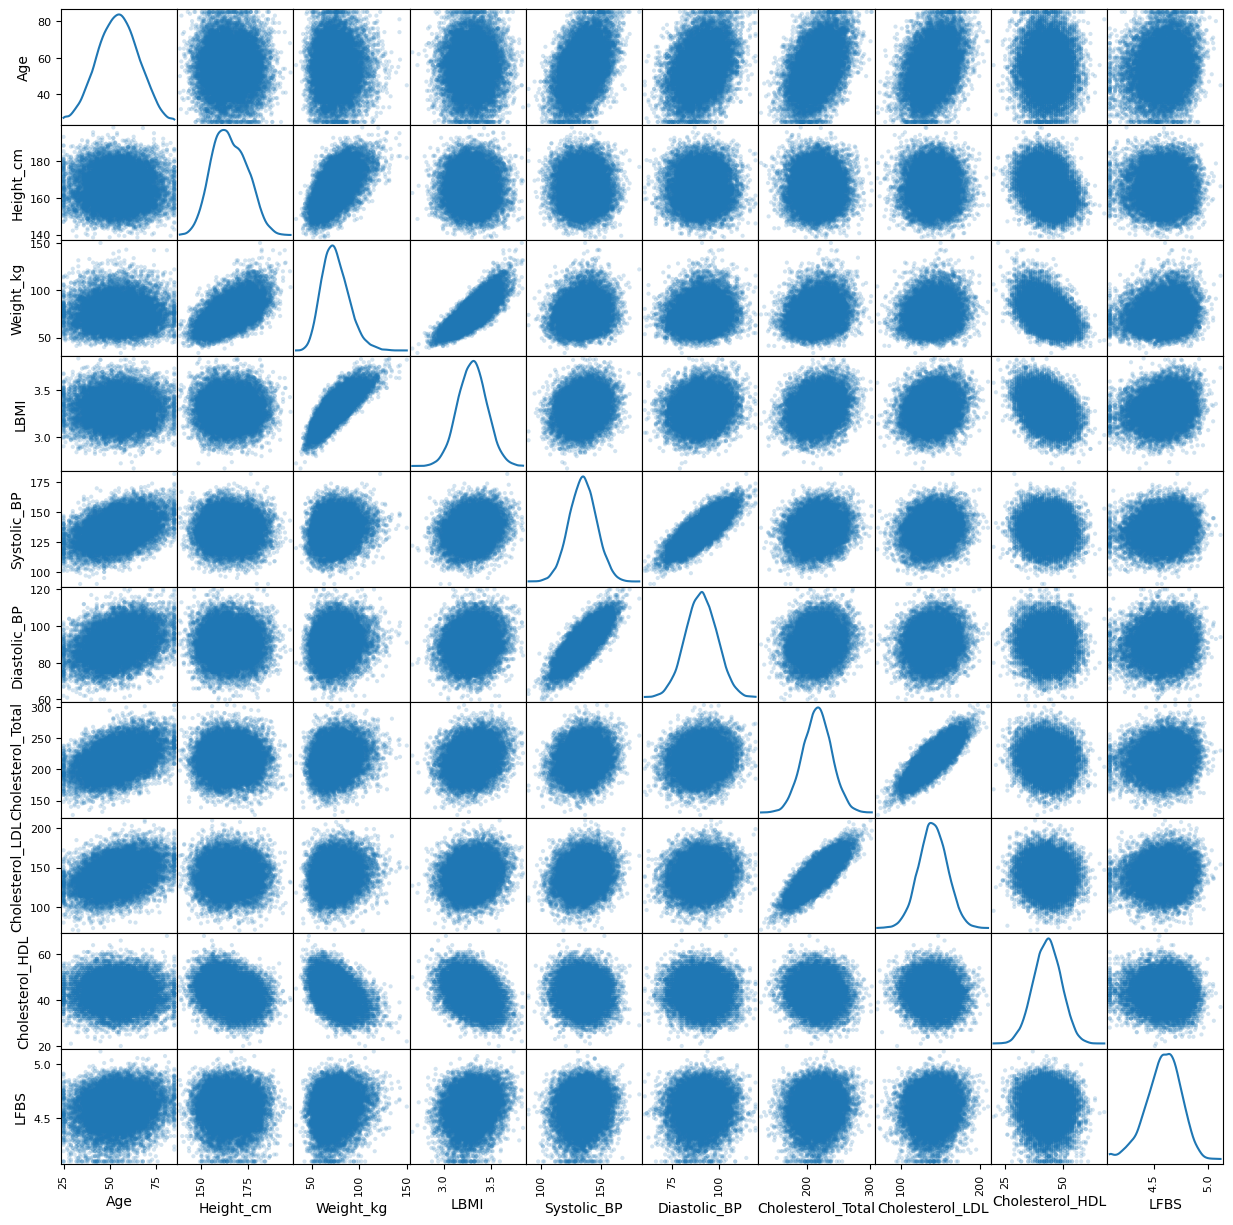

In [38]:
from pandas.plotting import scatter_matrix

quantitative_var = ["Age","Height_cm","Weight_kg","LBMI","Systolic_BP","Diastolic_BP",
                    "Cholesterol_Total","Cholesterol_LDL","Cholesterol_HDL", "LFBS"]

scatter_matrix(hsd[quantitative_var], alpha=0.2, 
               figsize=(15, 15), diagonal='kde')
plt.show()

pas de correlations notables sauf entre Cholesterol_Total/Cholesterol_LCD et BMI/Weight
Les profils gaussiens semblent bons partout.


In [ ]:
### ACP

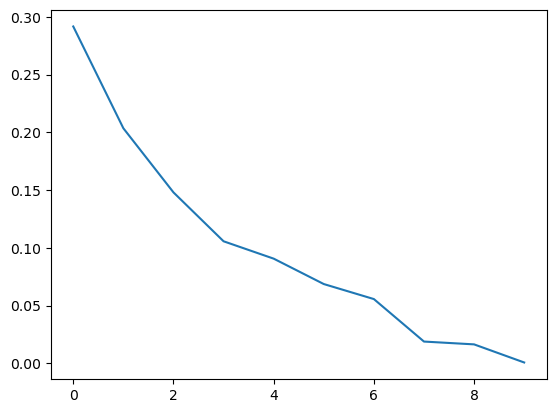

In [41]:
# réduction des variables

X=scale(hsd[quantitative_var])
pca = PCA()
## Estimation, calcul des composantes principales
C = pca.fit(X).transform(X)
## Décroissance de la variance expliquée
plt.plot(pca.explained_variance_ratio_)
plt.show()

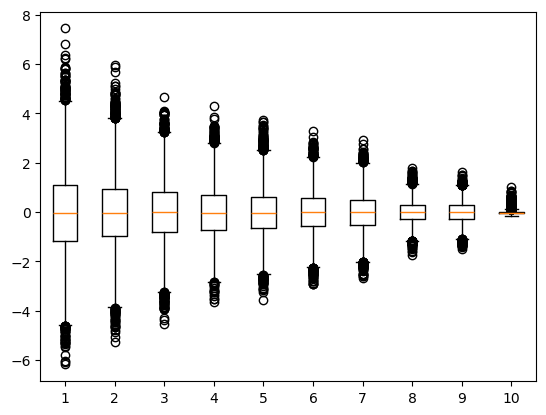

In [42]:
plt.boxplot(C[:,0:20])
plt.show()

Il ne semble pas y avoir de valeurs atypiques particulièrement

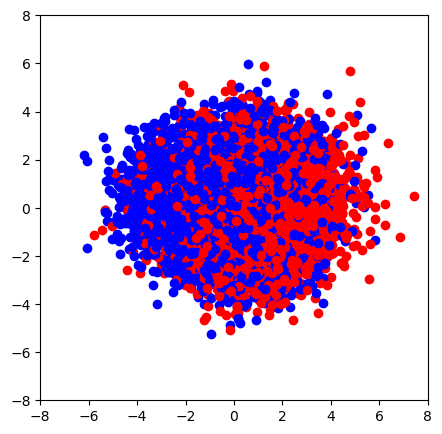

In [46]:
plt.figure(figsize=(5,5))
for i, j, nom in zip(C[:,0], C[:,1], hsd["Heart_Disease_Risk"]):
    color = "red" if nom  else "blue"
    plt.plot(i, j, "o",color=color)
plt.axis((-8,8,-8,8))  
plt.show()

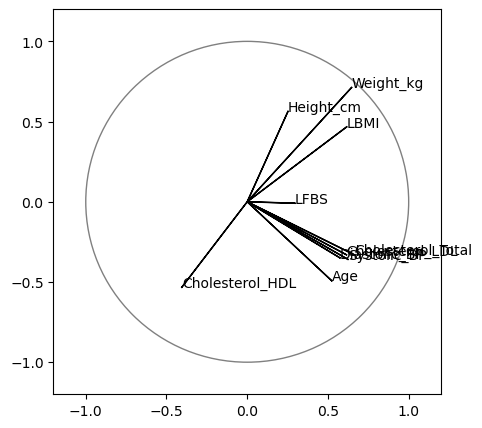

In [49]:
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, hsd[quantitative_var].columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

Correlation opposée entre Cholesterol_HDL et Weight_kg / Height_cm / LBMI
Beaucoup de variables correlées ensemble


### Clustering with K-means

In [52]:
from sklearn.cluster  import  KMeans
from  sklearn.metrics  import confusion_matrix
clust=KMeans(n_clusters=4)
clust.fit(X)
classe=clust.labels_
print(classe)
classe.shape

[0 1 1 ... 1 2 0]


(15000,)

[3 2 2 ... 1 0 3]


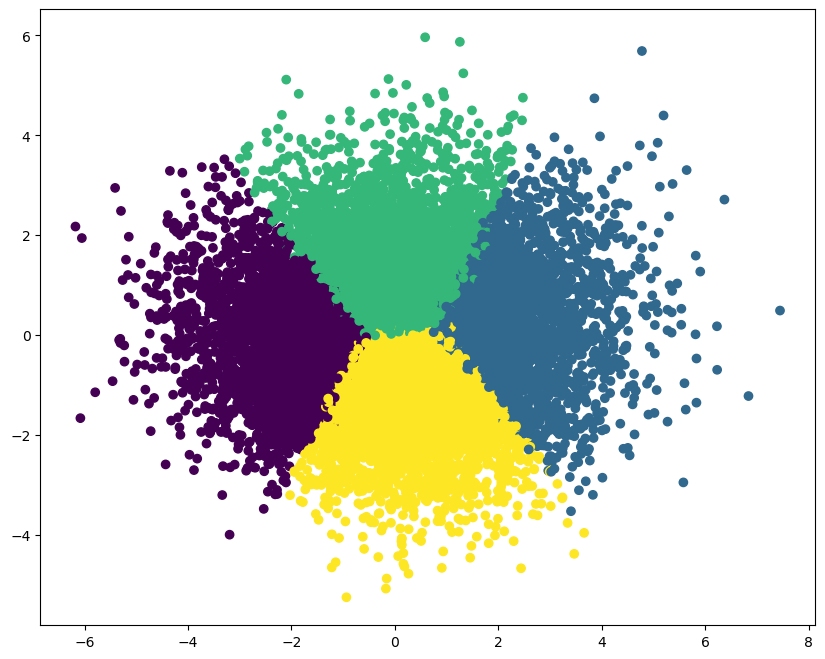

[2 0 1 ... 1 0 2]


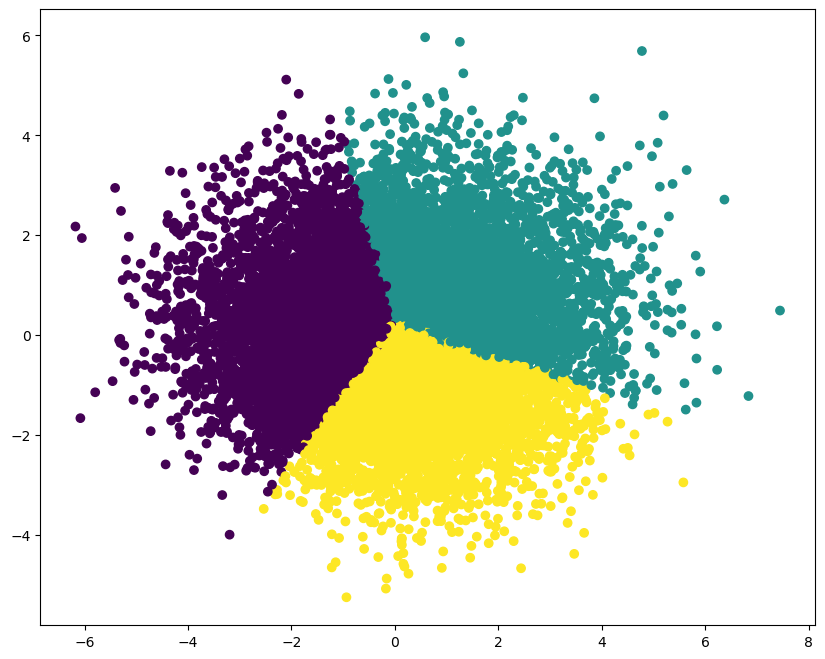

[0 0 1 ... 1 0 1]


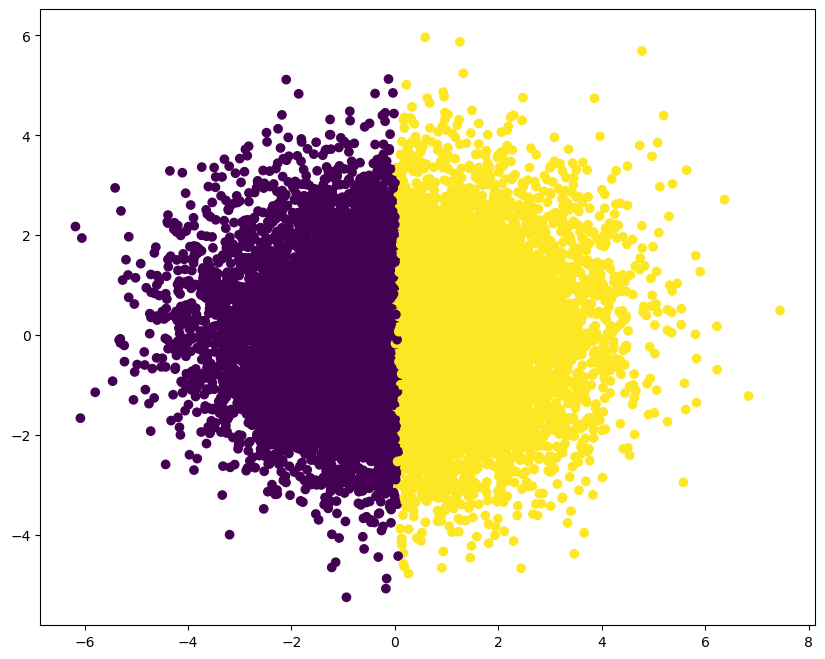

In [57]:
from sklearn.cluster  import  KMeans
from  sklearn.metrics  import confusion_matrix
clust_4=KMeans(n_clusters=4)
clust_4.fit(X)
classe_4=clust_4.labels_
print(classe_4)
classe_4.shape

plt.figure(figsize=(10,8))
plt.scatter(C[:,0], C[:,1], c=classe_4) 
plt.show()

clust_3=KMeans(n_clusters=3)
clust_3.fit(X)
classe_3=clust_3.labels_
print(classe_3)
classe_3.shape

plt.figure(figsize=(10,8))
plt.scatter(C[:,0], C[:,1], c=classe_3) 
plt.show()

clust_2=KMeans(n_clusters=2)
clust_2.fit(X)
classe_2=clust_2.labels_
print(classe_2)
classe_2.shape

plt.figure(figsize=(10,8))
plt.scatter(C[:,0], C[:,1], c=classe_2) 
plt.show()